In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data load


In [34]:
# load data

df = pd.read_csv('/content/drive/MyDrive/Datasets/Capstone/Crash_Reporting_-_Drivers_Data.csv')

<ipython-input-34-a35300d00161>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Datasets/Capstone/Crash_Reporting_-_Drivers_Data.csv')


In [35]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


In [36]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [37]:
id_cols = ['Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID', 'Agency Name', 'Road Name', 'Location']
df_wo_ids = df.drop(columns=id_cols)

In [38]:
df_wo_ids.shape

(183856, 32)

In [39]:
df_wo_ids.isna().sum()

,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,18036
Cross-Street Name,23186
Off-Road Description,166858
Municipality,164730
Related Non-Motorist,177991
Collision Type,585
Weather,13356
Surface Condition,21230


In [9]:
def clean_collision_type(df):
  df["Collision Type"].replace(dict.fromkeys(["HEAD ON LEFT TURN", "SAME DIRECTION LEFT TURN", "ANGLE MEETS LEFT TURN",
                                              "SAME DIR REND LEFT TURN", "SAME DIR BOTH LEFT TURN",
                                              "ANGLE MEETS LEFT HEAD ON", "OPPOSITE DIR BOTH LEFT TURN",
                                              "SAME DIRECTION RIGHT TURN", "ANGLE MEETS RIGHT TURN",
                                              "SAME DIR REND RIGHT TURN", "RIGHT TURN", "LEFT TURN"], "TURNS"), inplace = True)



  # df["Collision Type"].replace(dict.fromkeys(["SAME DIRECTION RIGHT TURN", "ANGLE MEETS RIGHT TURN",
  #                                             "SAME DIR REND RIGHT TURN"], "RIGHT TURN"), inplace = True)
  df["Collision Type"].replace(dict.fromkeys(["SAME DIR REAR END", "Sideswipe, Same Direction",
                                              "SAME DIRECTION SIDESWIPE"], "SAME DIR"), inplace = True)
  df["Collision Type"].replace(dict.fromkeys(["Unknown", "Other", "UNKNOWN"], "OTHER"), inplace=True)

  df["Collision Type"].replace(dict.fromkeys(["OPPOSITE DIRECTION SIDESWIPE", "Sideswipe, Opposite Direction"], "OPPOSITE DIR"), inplace=True)

  df["Collision Type"].replace(dict.fromkeys(["Front to Front"], "FRONT"), inplace=True)

  df["Collision Type"].replace(dict.fromkeys(["Rear To Rear"], "REAR"), inplace=True)

  df["Collision Type"].replace(dict.fromkeys(["Front to Rear", "Rear To Side", "FRONT", "REAR"], "FULL BODY"), inplace=True)


  df["Collision Type"].replace(dict.fromkeys(["STRAIGHT MOVEMENT ANGLE", "Angle"], "ANGLE"), inplace=True)

  #Single Vehicle

  df["Collision Type"].replace(dict.fromkeys(["Single Vehicle"], "SINGLE VEHICLE"), inplace=True)

  return df


In [41]:
df["Collision Type"].value_counts()

,count
Collision Type,
SAME DIR REAR END,55761
STRAIGHT MOVEMENT ANGLE,30342
OTHER,19030
SAME DIRECTION SIDESWIPE,16227
SINGLE VEHICLE,15872
HEAD ON LEFT TURN,12926
SAME DIRECTION RIGHT TURN,3832
HEAD ON,3786
SAME DIRECTION LEFT TURN,3715


In [42]:
# removing redundant cols

redundant_cols = ["Drivers License State","Vehicle Make", "Vehicle Model",
                                          "Cross-Street Name", "Collision Type", "Crash Date/Time",
                                          "Latitude", "Longitude"]

df_rem_red_cols = df_wo_ids.drop(columns= redundant_cols)

In [43]:
# drop columns with large number of nulls

df_large_nulls_cols_dropped = df_rem_red_cols.drop(columns=['Off-Road Description', 'Municipality', 'Related Non-Motorist', "Non-Motorist Substance Abuse"])

In [44]:
df_large_nulls_cols_dropped.shape

(183856, 20)

In [45]:
df_large_nulls_cols_dropped.isna().sum()

,0
ACRS Report Type,0
Route Type,18036
Weather,13356
Surface Condition,21230
Light,1445
Traffic Control,26489
Driver Substance Abuse,31322
Driver At Fault,0
Injury Severity,711
Circumstance,149249


In [46]:
df_large_nulls_cols_dropped['Vehicle First Impact Location'].value_counts()

,count
Vehicle First Impact Location,
TWELVE OCLOCK,68027
SIX OCLOCK,34276
ONE OCLOCK,16197
ELEVEN OCLOCK,13773
TWO OCLOCK,6238
TEN OCLOCK,6191
SEVEN OCLOCK,4279
FOUR OCLOCK,4126
FIVE OCLOCK,4064


In [47]:
df_large_nulls_cols_dropped['Vehicle_Body_Type_Cleaned'] = df_large_nulls_cols_dropped['Vehicle Body Type'].replace({
                                                          "Passenger Car":"PASSENGER CAR",
                                                          "(SPORT) UTILITY VEHICLE": "SUV",
                                                          "Sport Utility Vehicle": "SUV",
                                                          "Bus - Transit" : "TRANSIT",
                                                          "TRANSIT BUS": "TRANSIT",
                                                          "Bus - School": "SCHOOL BUS",
                                                          "OTHER BUS": "BUS",
                                                          "CROSS COUNTRY BUS": "BUS",
                                                          "Bus - Mini": "BUS",
                                                          "Bus - Cross Country": "BUS",
                                                          "Bus - Other Type": "BUS",
                                                          "Van - Passenger (&lt;9 Seats)": "VAN",
                                                          "Van - Passenger (9 or 12 Seats)": "VAN",
                                                          "Van - Cargo": "VAN",
                                                          "POLICE VEHICLE/NON EMERGENCY": "NON EMERGENCY",
                                                          "POLICE VEHICLE/EMERGENCY": "EMERGENCY",
                                                          "EMERGENCY BUS": "EMERGENCY",
                                                          "AMBULANCE/NON EMERGENCY": "NON EMERGENCY",
                                                          "AMBULANCE/EMERGENCY": "EMERGENCY",
                                                          "FIRE VEHICLE/EMERGENCY": "EMERGENCY",
                                                          "FIRE VEHICLE/NON EMERGENCY": "NON EMERGENCY",
                                                          "Unknown": "UNKNOWN",
                                                          "Other": "OTHER",
                                                          "OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)": "LIGHT TRUCK",
                                                          "CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))": "HEAVY TRUCK",
                                                          "MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))": "HEAVY TRUCK",
                                                          "Single-Unit Truck" : "TRUCK",
                                                          "Other Trucks": "TRUCK",
                                                          "TRUCK TRACTOR": "TRUCK",
                                                          "Pickup": "PICKUP TRUCK",
                                                          "Recreational Off-Highway Vehicles (ROV)": "RECREATIONAL VEHICLE",
                                                          "Moped Or motorized bicycle": "MOPED",
                                                          "All-Terrain Vehicle/All-Terrain Cycle (ATV/ATC)": "ALL TERRAIN VEHICLE (ATV)",
                                                          "Autocycle": "AUTOCYCLE",
                                                          "Farm Equipment (Tractor, combine harvester, etc.)": "FARM VEHICLE",
                                                          "Truck Tractor": "FARM VEHICLE",
                                                          "Low Speed Vehicle": "LOW SPEED VEHICLE",
                                                          "Motorcycle - 2 Wheeled": "MOTORCYCLE",
                                                          "Motorcycle - 3 Wheeled": "MOTORCYCLE",
                                                          "Snowmobile": "SNOWMOBILE",
                                                          "Construction Equipment (backhoe, bulldozer, etc.)": "CONSTRUCTION EQUIPMENT",
                                                          "Station Wagon": "STATION WAGON",

                                                          })

df_large_nulls_cols_dropped.drop(['Vehicle Body Type'], inplace=True, axis=1)

In [48]:
df_large_nulls_cols_dropped['Vehicle_Body_Type_Cleaned'].value_counts()

,count
Vehicle_Body_Type_Cleaned,
PASSENGER CAR,126620
SUV,17876
PICKUP TRUCK,7418
VAN,5296
TRANSIT,3953
HEAVY TRUCK,3327
SCHOOL BUS,3235
NON EMERGENCY,2600
EMERGENCY,2400


In [49]:
df_large_nulls_cols_dropped["Vehicle Damage Extent"].value_counts()

,count
Vehicle Damage Extent,
DISABLING,62355
FUNCTIONAL,44993
SUPERFICIAL,43878
DESTROYED,7610
UNKNOWN,6620
NO DAMAGE,6244
Disabling,5052
Superficial,3111
Functional,2684


In [50]:
category_mapping = {
    'disabling': 'DISABLING',
    'functional': 'FUNCTIONAL',
    'superficial': 'SUPERFICIAL',
    'destroyed': 'DESTROYED',
    'unknown': 'OTHER',  # Converting 'UNKNOWN' to 'OTHER' as a placeholder
    'no damage': 'NO DAMAGE',
    'vehicle not at scene': 'OTHER',  # Grouping as 'OTHER' or can be handled separately
    'other': 'OTHER'
}

# Standardize text and map categories
df_large_nulls_cols_dropped['Vehicle Damage Extent'] = (
    df_large_nulls_cols_dropped['Vehicle Damage Extent']
    .str.lower()                          # Convert to lowercase
    .str.strip()                          # Remove leading/trailing whitespaces
    .map(category_mapping)                # Map to standard categories
)

In [51]:
df_large_nulls_cols_dropped["Vehicle Going Dir"].value_counts()

,count
Vehicle Going Dir,
North,47647
South,46686
East,35297
West,34768
Unknown,5337
Northbound,2711
Southbound,2480
Eastbound,1946
Westbound,1779


In [52]:
direction_mapping = {
    'north': 'NORTH',
    'south': 'SOUTH',
    'east': 'EAST',
    'west': 'WEST',
    'unknown': 'OTHER',          # Handling non-directional as 'OTHER'
    'northbound': 'NORTH',
    'southbound': 'SOUTH',
    'eastbound': 'EAST',
    'westbound': 'WEST',
    'not on roadway': 'OTHER'    # Handling non-directional as 'OTHER'
}

# Standardize text and map to categories
df_large_nulls_cols_dropped['Vehicle Going Dir'] = (
    df_large_nulls_cols_dropped['Vehicle Going Dir']
    .str.lower()                          # Convert to lowercase
    .str.strip()                          # Remove leading/trailing whitespaces
    .map(direction_mapping)               # Map to standardized direction categories
)

In [53]:
df_large_nulls_cols_dropped["Parked Vehicle"].value_counts()

,count
Parked Vehicle,
No,179422
Yes,2900


In [54]:
df_large_nulls_cols_dropped.head()

,ACRS Report Type,Route Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle_Body_Type_Cleaned
0,Property Damage Crash,NaN,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,NO APPARENT INJURY,NaN,UNKNOWN,SUPERFICIAL,ONE OCLOCK,PARKED,NaN,0,No,Yes,2017,OTHER
1,Property Damage Crash,NaN,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,OTHER,UNKNOWN,PARKING,SOUTH,5,No,No,2012,PASSENGER CAR
2,Property Damage Crash,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,NO DAMAGE,SIX OCLOCK,BACKING,WEST,15,No,No,2015,PASSENGER CAR
3,Injury Crash,NaN,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,Unknown,NO APPARENT INJURY,NaN,UNKNOWN,NO DAMAGE,UNKNOWN,MOVING CONSTANT SPEED,OTHER,15,No,No,2018,PASSENGER CAR
4,Property Damage Crash,Maryland (State),CLEAR,DRY,DARK LIGHTS ON,STOP SIGN,NaN,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,DISABLING,TWELVE OCLOCK,MOVING CONSTANT SPEED,SOUTH,35,No,No,2017,PASSENGER CAR


In [55]:
df_large_nulls_cols_dropped["Route Type"].value_counts()

,count
Route Type,
Maryland (State),77079
County,55574
Municipality,9380
US (State),8120
County Route,4121
Maryland (State) Route,3978
Interstate (State),3301
Other Public Roadway,1219
Municipality Route,875


In [56]:
route_type_mapping = {
    "Maryland (State)": "STATE",
    "Maryland (State) Route": "STATE",
    "Interstate (State)": "STATE",
    "US (State)": "STATE",
    "Municipality": "MUNICIPALITY",
    "Municipality Route": "MUNICIPALITY",
    "County Route": "COUNTY",
    "County":  "COUNTY",
    "Government": "GOVERNMENT",
    "Government Route": "GOVERNMENT",
    "Other Public Roadway": "OTHER",
    "Local Route": "LOCAL",
    "Unknown": "OTHER",

}

df_large_nulls_cols_dropped["Route Type"].replace(route_type_mapping, inplace = True)


<ipython-input-56-8fdf3be1657b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_large_nulls_cols_dropped["Route Type"].replace(route_type_mapping, inplace = True)


In [57]:
df_large_nulls_cols_dropped.head()

,ACRS Report Type,Route Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle_Body_Type_Cleaned
0,Property Damage Crash,NaN,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,NO APPARENT INJURY,NaN,UNKNOWN,SUPERFICIAL,ONE OCLOCK,PARKED,NaN,0,No,Yes,2017,OTHER
1,Property Damage Crash,NaN,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,OTHER,UNKNOWN,PARKING,SOUTH,5,No,No,2012,PASSENGER CAR
2,Property Damage Crash,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,NO DAMAGE,SIX OCLOCK,BACKING,WEST,15,No,No,2015,PASSENGER CAR
3,Injury Crash,NaN,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,Unknown,NO APPARENT INJURY,NaN,UNKNOWN,NO DAMAGE,UNKNOWN,MOVING CONSTANT SPEED,OTHER,15,No,No,2018,PASSENGER CAR
4,Property Damage Crash,STATE,CLEAR,DRY,DARK LIGHTS ON,STOP SIGN,NaN,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,DISABLING,TWELVE OCLOCK,MOVING CONSTANT SPEED,SOUTH,35,No,No,2017,PASSENGER CAR


In [58]:
df_large_nulls_cols_dropped["ACRS Report Type"].value_counts()

,count
ACRS Report Type,
Property Damage Crash,117243
Injury Crash,66147
Fatal Crash,466


In [59]:
df_large_nulls_cols_dropped.columns

Index(['ACRS Report Type', 'Route Type', 'Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle_Body_Type_Cleaned'],
      dtype='object')

In [60]:

df_large_nulls_cols_dropped['Vehicle Movement'] = df_large_nulls_cols_dropped['Vehicle Movement'].str.upper()

# Define mappings for consistency
mapping = {
    'MOVING CONSTANT SPEED': 'MOVING CONSTANT SPEED',
    'SLOWING OR STOPPING': 'SLOWING OR STOPPING',
    'STOPPED IN TRAFFIC LANE': 'STOPPED IN TRAFFIC LANE',
    'MAKING LEFT TURN': 'TURNING LEFT',
    'ACCELERATING': 'ACCELERATING',
    'BACKING': 'BACKING',
    'CHANGING LANES': 'CHANGING LANES',
    'PARKED': 'PARKED',
    'UNKNOWN': 'OTHER',
    'OTHER': 'OTHER',
    'MAKING RIGHT TURN': 'TURNING RIGHT',
    'MAKING U TURN': 'TURNING U-TURN',
    'PASSING': 'OVERTAKING/PASSING',
    'ENTERING TRAFFIC LANE': 'ENTERING TRAFFIC LANE',
    'NEGOTIATING A CURVE': 'NEGOTIATING A CURVE',
    'RIGHT TURN ON RED': 'TURNING RIGHT',
    'LEAVING TRAFFIC LANE': 'LEAVING TRAFFIC LANE',
    'DRIVERLESS MOVING VEH.': 'DRIVERLESS MOVING VEHICLE'
}

# Apply mapping
df_large_nulls_cols_dropped['Vehicle Movement'] = df_large_nulls_cols_dropped['Vehicle Movement'].replace(mapping)


# df_large_nulls_cols_dropped = df_large_nulls_cols_dropped[
#     ~df_large_nulls_cols_dropped['Vehicle Movement'].isin(['OTHER', 'UNKNOWN'])
# ]
# df_large_nulls_cols_dropped['Vehicle Movement'].value_counts()

In [61]:
df_large_nulls_cols_dropped = df_large_nulls_cols_dropped[
    ~df_large_nulls_cols_dropped['Vehicle First Impact Location'].isin(['Underside', 'UNKNOWN', 'ROOF TOP', 'Non-Collision','NON-COLLISION', 'Top', 'Underside  ', 'Cargo Loss', 'UNDERSIDE', 'Vehicle Not at Scene'])
]


df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Eight O Clock', 'EIGHT OCLOCK'], 8)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Four O Clock', 'FOUR OCLOCK'], 4)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Five O Clock', 'FIVE OCLOCK'], 5)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Three O Clock', 'THREE OCLOCK'], 3)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Nine O Clock', 'NINE OCLOCK'], 9)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Seven O Clock', 'SEVEN OCLOCK'], 7)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Two O Clock', 'TWO OCLOCK'], '2')
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Ten O Clock', 'TEN OCLOCK'], 10)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Eleven O Clock', 'ELEVEN OCLOCK'], 11)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['One O Clock', 'ONE OCLOCK'], 1)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Six O Clock', 'SIX OCLOCK'], 6)
df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Twelve O Clock', 'TWELVE OCLOCK'], 12)

<ipython-input-61-92de0c715c3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Eight O Clock', 'EIGHT OCLOCK'], 8)
<ipython-input-61-92de0c715c3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_nulls_cols_dropped['Vehicle First Impact Location'] = df_large_nulls_cols_dropped['Vehicle First Impact Location'].replace(['Four O Clock', 'FOUR OCLOCK'], 4)


In [62]:
df_large_nulls_cols_dropped.isna().sum()

,0
ACRS Report Type,0
Route Type,16460
Weather,12877
Surface Condition,19546
Light,1405
Traffic Control,25180
Driver Substance Abuse,30557
Driver At Fault,0
Injury Severity,251
Circumstance,144777


In [38]:
def clean_injury_severity(df):
  df['Injury Severity'] = df['Injury Severity'].str.upper()

  # Define mapping to standardize entries
  mapping = {
      'NO APPARENT INJURY': 'NO APPARENT INJURY',
      'POSSIBLE INJURY': 'POSSIBLE INJURY',
      'SUSPECTED MINOR INJURY': 'SUSPECTED MINOR INJURY',
      'SUSPECTED SERIOUS INJURY': 'SUSPECTED SERIOUS INJURY',
      'FATAL INJURY': 'FATAL INJURY'
  }

  # Apply mapping
  df['Injury Severity'] = df['Injury Severity'].replace(mapping)

  severity_mapping = {
      'NO APPARENT INJURY': 'No',
      'POSSIBLE INJURY': 'Yes',
      'SUSPECTED MINOR INJURY': 'Yes',
      'SUSPECTED SERIOUS INJURY': 'Yes',
      'FATAL INJURY': 'Yes'
  }

  # Apply mapping
  df['Injury Severity'] = df['Injury Severity'].map(severity_mapping)
  return df

# Internal factors


In [41]:
df_large_nulls_cols_dropped = clean_injury_severity(df_large_nulls_cols_dropped)
df_large_nulls_cols_dropped['Injury Severity'].value_counts()

NameError: name 'df_large_nulls_cols_dropped' is not defined

In [65]:
df_large_nulls_cols_dropped['SEVERE_INJURY'] = df_large_nulls_cols_dropped['Injury Severity'].replace({"No": 0, "Yes": 1})
df_large_nulls_cols_dropped.drop(['Injury Severity'], inplace = True, axis = 1)

df_large_nulls_cols_dropped['SEVERE_INJURY'].value_counts()

<ipython-input-65-3f587019a5cd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_large_nulls_cols_dropped['SEVERE_INJURY'] = df_large_nulls_cols_dropped['Injury Severity'].replace({"No": 0, "Yes": 1})


,count
SEVERE_INJURY,
0.0,145638
1.0,32555


In [66]:
# columns out of scope

cols_out_of_scope = ['Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Driver At Fault', 'Circumstance', 'Driver Distracted By',"Speed Limit"]

df_in_scope = df_large_nulls_cols_dropped.drop(columns=cols_out_of_scope)

In [67]:
df_in_scope.shape

(178444, 11)

In [68]:
df_in_scope.isna().sum()

,0
ACRS Report Type,0
Route Type,16460
Vehicle Damage Extent,244
Vehicle First Impact Location,156
Vehicle Movement,981
Vehicle Going Dir,4414
Driverless Vehicle,0
Parked Vehicle,1400
Vehicle Year,0
Vehicle_Body_Type_Cleaned,1807


In [69]:
df_in_scope.columns


Index(['ACRS Report Type', 'Route Type', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Movement',
       'Vehicle Going Dir', 'Driverless Vehicle', 'Parked Vehicle',
       'Vehicle Year', 'Vehicle_Body_Type_Cleaned', 'SEVERE_INJURY'],
      dtype='object')

In [70]:
df_in_scope.dropna(inplace = True)

In [71]:
df_in_scope.head()

,ACRS Report Type,Route Type,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Movement,Vehicle Going Dir,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle_Body_Type_Cleaned,SEVERE_INJURY
4,Property Damage Crash,STATE,DISABLING,12,MOVING CONSTANT SPEED,SOUTH,No,No,2017,PASSENGER CAR,0.0
5,Injury Crash,STATE,FUNCTIONAL,6,SLOWING OR STOPPING,EAST,No,No,2010,SUV,0.0
6,Property Damage Crash,COUNTY,FUNCTIONAL,9,MOVING CONSTANT SPEED,EAST,No,No,2022,PASSENGER CAR,0.0
7,Injury Crash,COUNTY,DESTROYED,12,OTHER,WEST,No,No,2005,SUV,1.0
8,Property Damage Crash,STATE,FUNCTIONAL,6,STOPPED IN TRAFFIC LANE,SOUTH,No,No,2016,PASSENGER CAR,0.0


In [72]:
df_temp = df_in_scope
df_temp['Route Type'] = df_in_scope['Route Type'].fillna('OTHER')

df_temp["Vehicle Damage Extent"] = df_temp["Vehicle Damage Extent"].fillna('UNKNOWN')

df_temp["Vehicle Going Dir"].fillna('OTHER', inplace=True)

df_temp["Parked Vehicle"].fillna('No', inplace=True)

df_temp["Vehicle_Body_Type_Cleaned"].fillna('UNKNOWN', inplace = True)

df_temp["Vehicle Movement"].fillna('OTHER', inplace = True)

df_temp["Vehicle First Impact Location"].fillna(-1, inplace = True)

df_temp["SEVERE_INJURY"].fillna(0, inplace = True)

df_temp.isna().sum()








<ipython-input-72-5b49438242c9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp["Vehicle Going Dir"].fillna('OTHER', inplace=True)
<ipython-input-72-5b49438242c9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
ACRS Report Type,0
Route Type,0
Vehicle Damage Extent,0
Vehicle First Impact Location,0
Vehicle Movement,0
Vehicle Going Dir,0
Driverless Vehicle,0
Parked Vehicle,0
Vehicle Year,0
Vehicle_Body_Type_Cleaned,0


In [73]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155536 entries, 4 to 183854
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ACRS Report Type               155536 non-null  object 
 1   Route Type                     155536 non-null  object 
 2   Vehicle Damage Extent          155536 non-null  object 
 3   Vehicle First Impact Location  155536 non-null  object 
 4   Vehicle Movement               155536 non-null  object 
 5   Vehicle Going Dir              155536 non-null  object 
 6   Driverless Vehicle             155536 non-null  object 
 7   Parked Vehicle                 155536 non-null  object 
 8   Vehicle Year                   155536 non-null  int64  
 9   Vehicle_Body_Type_Cleaned      155536 non-null  object 
 10  SEVERE_INJURY                  155536 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 14.2+ MB


In [74]:
df_temp["Vehicle First Impact Location"] = df_temp["Vehicle First Impact Location"].astype(int)

In [75]:
df_temp.isna().sum()

,0
ACRS Report Type,0
Route Type,0
Vehicle Damage Extent,0
Vehicle First Impact Location,0
Vehicle Movement,0
Vehicle Going Dir,0
Driverless Vehicle,0
Parked Vehicle,0
Vehicle Year,0
Vehicle_Body_Type_Cleaned,0


In [76]:
# prompt: one hot encoding for categorical columns

# Perform one-hot encoding on categorical columns
categorical_cols = ["ACRS Report Type", 'Route Type', 'Vehicle Damage Extent', 'Vehicle Going Dir', 'Parked Vehicle', 'Vehicle_Body_Type_Cleaned', 'Vehicle Movement', 'Driverless Vehicle']
df_cleaned_encoded = pd.get_dummies(df_temp, columns=categorical_cols, drop_first=True, dtype = int)

# Display the encoded DataFrame
df_cleaned_encoded.head()

,Vehicle First Impact Location,Vehicle Year,SEVERE_INJURY,ACRS Report Type_Injury Crash,ACRS Report Type_Property Damage Crash,Route Type_COUNTY,Route Type_Crossover,Route Type_GOVERNMENT,Route Type_LOCAL,Route Type_MUNICIPALITY,...,Vehicle Movement_SKIDDING,Vehicle Movement_SLOWING OR STOPPING,Vehicle Movement_STARTING FROM LANE,Vehicle Movement_STARTING FROM PARKED,Vehicle Movement_STOPPED IN TRAFFIC,Vehicle Movement_STOPPED IN TRAFFIC LANE,Vehicle Movement_TURNING LEFT,Vehicle Movement_TURNING RIGHT,Vehicle Movement_TURNING U-TURN,Driverless Vehicle_Unknown
4,12,2017,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,2010,0.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,9,2022,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12,2005,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6,2016,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
df_temp.shape

(155536, 11)

## Modeling

In [78]:
# prompt: SMOTE

from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_cleaned_encoded.drop('SEVERE_INJURY', axis=1)
y = df_cleaned_encoded['SEVERE_INJURY']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['SEVERE_INJURY'] = y_resampled

In [79]:
# prompt: train test split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_resampled.drop('SEVERE_INJURY', axis=1),
    df_resampled['SEVERE_INJURY'],
    test_size=0.3,  # Adjust test_size as needed
    random_state=42  # Set random_state for reproducibility
)

In [80]:
# prompt: logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     37301
         1.0       0.85      0.98      0.91     37638

    accuracy                           0.90     74939
   macro avg       0.91      0.90      0.90     74939
weighted avg       0.91      0.90      0.90     74939

[[30559  6742]
 [  788 36850]]


In [81]:
X_new = X.drop(["Vehicle_Body_Type_Cleaned_PASSENGER CAR","ACRS Report Type_Property Damage Crash", "Vehicle Year"], axis = 1)

In [82]:
# # prompt: vif

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_new.columns
# vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]

# # Display VIF values
# vif_data

In [83]:
# vif_data.sort_values(by='VIF', ascending=False)

In [84]:
# prompt: get feature importance of logreg

# Get feature importance from coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(logreg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(20)

,Feature,Importance
3,ACRS Report Type_Property Damage Crash,9.501093
17,Vehicle Damage Extent_NO DAMAGE,5.080835
18,Vehicle Damage Extent_OTHER,4.025988
30,Vehicle_Body_Type_Cleaned_HEAVY TRUCK,3.508472
19,Vehicle Damage Extent_SUPERFICIAL,2.896054
31,Vehicle_Body_Type_Cleaned_LIGHT TRUCK,2.597257
35,Vehicle_Body_Type_Cleaned_MOTORCYCLE,2.410814
50,Vehicle Movement_CHANGING LANES,2.353435
16,Vehicle Damage Extent_FUNCTIONAL,2.344618
69,Vehicle Movement_TURNING U-TURN,2.275069


In [85]:
# prompt: randomforestclassifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     37301
         1.0       0.88      0.96      0.92     37638

    accuracy                           0.91     74939
   macro avg       0.92      0.91      0.91     74939
weighted avg       0.92      0.91      0.91     74939

[[32322  4979]
 [ 1585 36053]]


In [86]:
# prompt: decisiontreeclassifier

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     37301
         1.0       0.88      0.94      0.91     37638

    accuracy                           0.91     74939
   macro avg       0.91      0.91      0.91     74939
weighted avg       0.91      0.91      0.91     74939

[[32492  4809]
 [ 2214 35424]]


In [ ]:
# # prompt: SVC

# from sklearn.svm import SVC

# # Initialize and train the SVC model
# svc_classifier = SVC(random_state=42)  # Set random_state for reproducibility
# svc_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_svc = svc_classifier.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred_svc))
# print(confusion_matrix(y_test, y_pred_svc))

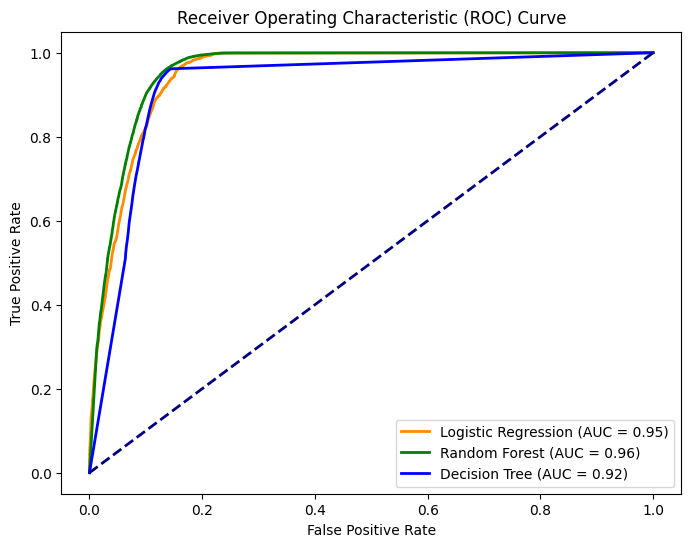

In [88]:
# prompt: AUC ROC Curve for logistic regression, random forest, decision tree

from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC Curve
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Random Forest ROC Curve
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Decision Tree ROC Curve
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Non motorist

In [4]:
nmdf = pd.read_csv("/content/drive/MyDrive/Datasets/Capstone/Crash_Reporting_-_Non-Motorists_Data_20240909.csv")
nmdf.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
0,MCP9419004R,230052006,Montgomery County Police,Injury Crash,08/29/2023 02:00:00 PM,NaN,NaN,NaN,VEIP TESTING CENTER\n15910 CHIEFTAIN AVE\nDERW...,NaN,...,OTHER,Other,OTHER,INSIDE BUILDING,No,POSSIBLE INJURY,NONE,39.118105,-77.161993,"(39.118105, -77.16199333)"
1,MCP3129009G,240026455,MONTGOMERY,Injury Crash,06/04/2024 06:39:00 AM,Maryland (State) Route,GEORGIA AVE,NORBECK RD,NaN,NaN,...,Pedestrian,Unknown,Unknown,Unknown,No,Suspected Serious Injury,NaN,39.109398,-77.075777,"(39.10939844, -77.07577749)"
2,MCP3353001Z,230069152,Montgomery County Police,Injury Crash,11/30/2023 04:19:00 PM,NaN,NaN,NaN,PARKING LOT OF 4301 RANDOLPH RD,NaN,...,PEDESTRIAN,Standing,NO IMPROPER ACTIONS,OTHER,No,POSSIBLE INJURY,NaN,39.056061,-77.083503,"(39.05606117, -77.0835027)"
3,MCP30750041,230061896,Montgomery County Police,Injury Crash,10/21/2023 10:34:00 PM,NaN,NaN,NaN,PARKING LOT OF 22201 FULMER AVE,NaN,...,OTHER,Other,OTHER,OTHER,Yes,SUSPECTED MINOR INJURY,NaN,39.219310,-77.287255,"(39.21931, -77.287255)"
4,MCP3129009F,240025812,MONTGOMERY,Injury Crash,05/31/2024 11:57:00 AM,County Route,ASPEN HILL RD,NaN,NaN,NaN,...,"Other Pedestrian (person in a building, skater...",Standing,None (No Improper Action),Other,No,Suspected Minor Injury,NaN,39.080234,-77.081001,"(39.08023358, -77.08100069)"


In [5]:
nmdf.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Pedestrian Type',
       'Pedestrian Movement', 'Pedestrian Actions', 'Pedestrian Location',
       'At Fault', 'Injury Severity', 'Safety Equipment', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
cols_to_drop_nm = ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Municipality', 'Cross-Street Name', 'Related Non-Motorist', 'Collision Type',
       'Off-Road Description', 'Person ID' , "Pedestrian Actions", 'Traffic Control', 'Latitude',
       'Longitude', 'Location']

nmdf_new = nmdf.drop(columns=cols_to_drop_nm)

In [10]:
nmdf = clean_collision_type(nmdf)

<ipython-input-9-d22cf6adf48a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Collision Type"].replace(dict.fromkeys(["HEAD ON LEFT TURN", "SAME DIRECTION LEFT TURN", "ANGLE MEETS LEFT TURN",


In [11]:
nmdf['Collision Type'].value_counts()

,count
Collision Type,
OTHER,2446
SINGLE VEHICLE,2182
ANGLE,690
TURNS,273
SAME DIR,248
HEAD ON,42
OPPOSITE DIR,18
FULL BODY,7


In [12]:
nmdf_new.isna().sum()

,0
Weather,458
Surface Condition,1481
Light,46
Driver Substance Abuse,1086
Non-Motorist Substance Abuse,1203
Pedestrian Type,0
Pedestrian Movement,173
Pedestrian Location,153
At Fault,287
Injury Severity,0


In [13]:
nmdf_new.head()

,Weather,Surface Condition,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,Pedestrian Type,Pedestrian Movement,Pedestrian Location,At Fault,Injury Severity,Safety Equipment
0,CLEAR,NaN,DAYLIGHT,NaN,NONE DETECTED,OTHER,Other,INSIDE BUILDING,No,POSSIBLE INJURY,NONE
1,Clear,Dry,Daylight,"Not Suspect of Alcohol Use, Not Suspect of Dru...","Not Suspect of Alcohol Use, Not Suspect of Dru...",Pedestrian,Unknown,Unknown,No,Suspected Serious Injury,NaN
2,CLEAR,NaN,DAYLIGHT,NONE DETECTED,NONE DETECTED,PEDESTRIAN,Standing,OTHER,No,POSSIBLE INJURY,NaN
3,CLEAR,NaN,DARK NO LIGHTS,NaN,NONE DETECTED,OTHER,Other,OTHER,Yes,SUSPECTED MINOR INJURY,NaN
4,Clear,Dry,Daylight,"Not Suspect of Alcohol Use, Not Suspect of Dru...","Not Suspect of Alcohol Use, Not Suspect of Dru...","Other Pedestrian (person in a building, skater...",Standing,Other,No,Suspected Minor Injury,NaN


In [14]:
nmdf_new["Non-Motorist Substance Abuse"].value_counts()

,count
Non-Motorist Substance Abuse,
NONE DETECTED,4014
"Not Suspect of Alcohol Use, Not Suspect of Drug Use",395
UNKNOWN,225
ALCOHOL PRESENT,151
ALCOHOL CONTRIBUTED,40
"Suspect of Alcohol Use, Not Suspect of Drug Use",14
"Unknown, Unknown",12
ILLEGAL DRUG PRESENT,7
"Suspect of Alcohol Use, Unknown",6


In [15]:
def clean_substance_abuse(df, col):

  df[col].replace(dict.fromkeys(["ALCOHOL PRESENT", "ALCOHOL CONTRIBUTED", "Suspect of Alcohol Use, Unknown" ,
                                                                  "Suspect of Alcohol Use, Not Suspect of Drug Use",
                                                                  "Suspect of Alcohol Use, Suspect of Drug Use"
                                  "ALCOHOL CONTRIBUTED, N/A", "ALCOHOL CONTRIBUTED, NONE DETECTED", "ALCOHOL PRESENT, NONE DETECTED",
                                 "ALCOHOL PRESENT, UNKNOWN", "ALCOHOL CONTRIBUTED, N/A", "ALCOHOL PRESENT, N/A", "ALCOHOL PRESENT, N/A",



                                                                  ], "ALCOHOL"), inplace = True)

  df[col].replace(dict.fromkeys(["Not Suspect of Alcohol Use, Not Suspect of Drug Use", "Not Suspect of Alcohol Use, Unknown",
                                                                  "Unknown, Not Suspect of Drug Use", "NONE DETECTED",
                                 "Not Suspect of Alcohol Use, Not Suspect of Drug Use, Not Suspect of Alcohol Use, Not Suspect of Drug Use",
                                  "Not Suspect of Alcohol Use, Not Suspect of Drug Use, Unknown, Unknown",
                                 "N/A, NONE DETECTED" ,  "N/A, NONE DETECTED"
                                                                  ], "NONE"), inplace = True)

  df[col].replace(dict.fromkeys(["ILLEGAL DRUG CONTRIBUTED", "ILLEGAL DRUG PRESENT",
                                                                  "Not Suspect of Alcohol Use, Suspect of Drug Use"
                                                                  ,"COMBINATION CONTRIBUTED", "COMBINED SUBSTANCE PRESENT", "COMBINED SUBSTANCE PRESENT, NONE DETECTED"
                                                                  ], "DRUGS"), inplace = True)


  df[col].replace(dict.fromkeys(["OTHER", "Unknown, Unknown", "NONE DETECTED, UNKNOWN",
                                 "Not Suspect of Alcohol Use, Not Suspect of Drug Use, Unknown, Unknown",
                                 "Not Suspect of Alcohol Use, Not Suspect of Drug Use, Not Suspect of Alcohol Use, Not Suspect of Drug Use, Unknown, Unknown",

                                                                  ], "UNKNOWN"), inplace = True)

  df[col].replace({"MEDICATION PRESENT": "MEDICATION", "MEDICATION PRESENT, NONE DETECTED": "MEDICATION"}, inplace = True)

  return df


nmdf_new = clean_substance_abuse(nmdf_new, "Non-Motorist Substance Abuse")

<ipython-input-15-d23c5b251a4e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(dict.fromkeys(["ALCOHOL PRESENT", "ALCOHOL CONTRIBUTED", "Suspect of Alcohol Use, Unknown" ,


In [16]:
nmdf_new = clean_substance_abuse(nmdf_new, "Driver Substance Abuse")

<ipython-input-15-d23c5b251a4e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(dict.fromkeys(["ALCOHOL PRESENT", "ALCOHOL CONTRIBUTED", "Suspect of Alcohol Use, Unknown" ,


In [17]:
nmdf_new["Driver Substance Abuse"].value_counts()

,count
Driver Substance Abuse,
NONE,4140
UNKNOWN,769
ALCOHOL,78
DRUGS,8
MEDICATION,3


In [18]:
nmdf_new["Safety Equipment"].value_counts()
#

,count
Safety Equipment,
NONE,2862
MC/BIKE HELMET,615
UNKNOWN,125
REFLECTIVE CLOTHING,104
Helmet,34
OTHER,22
LIGHTING,13
Unknown,9
"Reflective Wear (backpack, triangles, etc.)",4


In [19]:
# prompt: create new column with if Safety Equipment
# column has helmet then yes else no

# Create the new column 'Helmet' based on the 'Safety Equipment' column
nmdf_new['Helmet'] = nmdf_new['Safety Equipment'].apply(lambda x: 1 if 'helmet' in str(x).lower() else 0)
nmdf_new.drop('Safety Equipment', axis=1, inplace=True)

In [20]:
nmdf_new["Pedestrian Location"].value_counts()

,count
Pedestrian Location,
ON ROADWAY AT CROSSWALK,1503
ON ROADWAY NOT AT CROSSWALK,1170
OTHER,976
AT INTERSECTION MARKED CROSSWALK,664
SIDEWALK,388
AT INTERSECTION BUT NO CROSSWALK,246
Intersection Marked Crosswalk,156
SHOULDER,143
Other,73


In [21]:
nmdf_new['Pedestrian_Loca_At_Crosswalk'] = nmdf_new['Pedestrian Location'].apply(lambda x: 1 if 'crosswalk' in str(x).lower() else 0)
nmdf_new.drop('Pedestrian Location', axis=1, inplace=True)

In [22]:
nmdf_new["Pedestrian Type"].value_counts()

,count
Pedestrian Type,
PEDESTRIAN,4034
BICYCLIST,1189
Pedestrian,289
OTHER,275
OTHER CONVEYANCE,85
Cyclist (non-electric),78
MACHINE OPERATOR/RIDER,40
OTHER PEDALCYCLIST,26
Scooter (electric),25


In [23]:
nmdf_new['IsCyclist'] = nmdf_new['Pedestrian Type'].apply(lambda x: 1 if 'cyclist' in str(x).lower() else 0)
nmdf_new['IsPedestrian'] = nmdf_new['Pedestrian Type'].apply(lambda x: 1 if 'pedestrian' in str(x).lower() else 0)


In [24]:


nmdf_new.drop('Pedestrian Type', axis=1, inplace=True)

In [25]:
nmdf_new.head()

,Weather,Surface Condition,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,Pedestrian Movement,At Fault,Injury Severity,Helmet,Pedestrian_Loca_At_Crosswalk,IsCyclist,IsPedestrian
0,CLEAR,NaN,DAYLIGHT,NaN,NONE,Other,No,POSSIBLE INJURY,0,0,0,0
1,Clear,Dry,Daylight,NONE,NONE,Unknown,No,Suspected Serious Injury,0,0,0,1
2,CLEAR,NaN,DAYLIGHT,NONE,NONE,Standing,No,POSSIBLE INJURY,0,0,0,1
3,CLEAR,NaN,DARK NO LIGHTS,NaN,NONE,Other,Yes,SUSPECTED MINOR INJURY,0,0,0,0
4,Clear,Dry,Daylight,NONE,NONE,Standing,No,Suspected Minor Injury,0,0,0,1


In [26]:
nmdf_new["Weather"].value_counts()

,count
Weather,
CLEAR,3949
RAINING,601
CLOUDY,523
Clear,329
Rain,54
Cloudy,45
UNKNOWN,32
SNOW,29
FOGGY,22


In [27]:
nmdf_new['ClearWeather'] = nmdf_new['Weather'].apply(lambda x: 1 if 'clear' in str(x).lower() else 0)


nmdf_new.drop('Weather', axis=1, inplace=True)

In [28]:
nmdf_new["Surface Condition"].value_counts()

,count
Surface Condition,
DRY,3520
WET,687
Dry,276
Wet,56
UNKNOWN,25
SNOW,16
ICE,11
OTHER,5
SLUSH,4


In [29]:
nmdf_new['DrySurfaceCondition'] = nmdf_new['Surface Condition'].apply(lambda x: 1 if 'dry' in str(x).lower() else 0)


nmdf_new.drop('Surface Condition', axis=1, inplace=True)

In [30]:
nmdf_new["Light"].value_counts()

,count
Light,
DAYLIGHT,3604
DARK LIGHTS ON,1456
Daylight,315
DARK NO LIGHTS,211
DUSK,127
DAWN,104
Dark - Lighted,83
DARK -- UNKNOWN LIGHTING,68
UNKNOWN,19


In [31]:
nmdf_new["Light"].replace({"Daylight": "DAYLIGHT", "Dawn": "DAWN", "Dusk": "DUSK"}, inplace = True)


nmdf_new["Light"].replace(dict.fromkeys(["DARK NO LIGHTS", "DARK LIGHTS ON", "Dark - Lighted", "DARK -- UNKNOWN LIGHTING",
                                         "Dark - Not Lighted", "Dark - Not Lighted",
"Dark - Unknown Lighting"], "DARK" ), inplace = True)

nmdf_new["Light"].replace(dict.fromkeys(["Other", "OTHER", "Unknown"], "UNKNOWN"), inplace = True)


<ipython-input-31-764e93e5d508>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nmdf_new["Light"].replace({"Daylight": "DAYLIGHT", "Dawn": "DAWN", "Dusk": "DUSK"}, inplace = True)


In [32]:
nmdf_new['Pedestrian_Movement_Crossing'] = nmdf_new['Pedestrian Movement'].apply(lambda x: 1 if 'cross' in str(x).lower() else 0)
nmdf_new['Pedestrian_Movement_Walking'] = nmdf_new['Pedestrian Movement'].apply(lambda x: 1 if 'walk' in str(x).lower() else 0)


nmdf_new.drop('Pedestrian Movement', axis=1, inplace=True)

In [33]:
nmdf_new.shape

(6084, 13)

In [34]:
nmdf_new.columns

Index(['Light', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'At Fault', 'Injury Severity', 'Helmet', 'Pedestrian_Loca_At_Crosswalk',
       'IsCyclist', 'IsPedestrian', 'ClearWeather', 'DrySurfaceCondition',
       'Pedestrian_Movement_Crossing', 'Pedestrian_Movement_Walking'],
      dtype='object')

In [35]:
nmdf_new.head()

,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,At Fault,Injury Severity,Helmet,Pedestrian_Loca_At_Crosswalk,IsCyclist,IsPedestrian,ClearWeather,DrySurfaceCondition,Pedestrian_Movement_Crossing,Pedestrian_Movement_Walking
0,DAYLIGHT,NaN,NONE,No,POSSIBLE INJURY,0,0,0,0,1,0,0,0
1,DAYLIGHT,NONE,NONE,No,Suspected Serious Injury,0,0,0,1,1,1,0,0
2,DAYLIGHT,NONE,NONE,No,POSSIBLE INJURY,0,0,0,1,1,0,0,0
3,DARK,NaN,NONE,Yes,SUSPECTED MINOR INJURY,0,0,0,0,1,0,0,0
4,DAYLIGHT,NONE,NONE,No,Suspected Minor Injury,0,0,0,1,1,1,0,0


In [36]:
nmdf_new['Injury Severity'].value_counts()

,count
Injury Severity,
SUSPECTED MINOR INJURY,2478
POSSIBLE INJURY,1860
SUSPECTED SERIOUS INJURY,631
NO APPARENT INJURY,558
Suspected Minor Injury,231
FATAL INJURY,123
Possible Injury,100
No Apparent Injury,56
Suspected Serious Injury,39


In [39]:
nmdf_new = clean_injury_severity(nmdf_new)

In [40]:
nmdf_new["Injury Severity"].value_counts()

,count
Injury Severity,
Yes,5470
No,614


In [42]:
nmdf_new.head()

,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,At Fault,Injury Severity,Helmet,Pedestrian_Loca_At_Crosswalk,IsCyclist,IsPedestrian,ClearWeather,DrySurfaceCondition,Pedestrian_Movement_Crossing,Pedestrian_Movement_Walking
0,DAYLIGHT,NaN,NONE,No,Yes,0,0,0,0,1,0,0,0
1,DAYLIGHT,NONE,NONE,No,Yes,0,0,0,1,1,1,0,0
2,DAYLIGHT,NONE,NONE,No,Yes,0,0,0,1,1,0,0,0
3,DARK,NaN,NONE,Yes,Yes,0,0,0,0,1,0,0,0
4,DAYLIGHT,NONE,NONE,No,Yes,0,0,0,1,1,1,0,0


In [43]:
nmdf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Light                         6038 non-null   object
 1   Driver Substance Abuse        4998 non-null   object
 2   Non-Motorist Substance Abuse  4881 non-null   object
 3   At Fault                      5797 non-null   object
 4   Injury Severity               6084 non-null   object
 5   Helmet                        6084 non-null   int64 
 6   Pedestrian_Loca_At_Crosswalk  6084 non-null   int64 
 7   IsCyclist                     6084 non-null   int64 
 8   IsPedestrian                  6084 non-null   int64 
 9   ClearWeather                  6084 non-null   int64 
 10  DrySurfaceCondition           6084 non-null   int64 
 11  Pedestrian_Movement_Crossing  6084 non-null   int64 
 12  Pedestrian_Movement_Walking   6084 non-null   int64 
dtypes: int64(8), objec

In [44]:
cleaned_nmdf = nmdf_new.dropna()

In [45]:
cleaned_nmdf.shape

(4362, 13)

In [48]:
cleaned_nmdf.columns

Index(['Light', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'At Fault', 'Injury Severity', 'Helmet', 'Pedestrian_Loca_At_Crosswalk',
       'IsCyclist', 'IsPedestrian', 'ClearWeather', 'DrySurfaceCondition',
       'Pedestrian_Movement_Crossing', 'Pedestrian_Movement_Walking'],
      dtype='object')

In [47]:
# prompt: get dummies for categorical cols

# Perform one-hot encoding on categorical columns
categorical_cols_nm = ["Non-Motorist Substance Abuse", "Driver Substance Abuse", "Light", "At Fault",]
nmdf_cleaned_encoded = pd.get_dummies(cleaned_nmdf, columns=categorical_cols_nm, drop_first=True, dtype=int)

# Display the encoded DataFrame
nmdf_cleaned_encoded.head()

,Injury Severity,Helmet,Pedestrian_Loca_At_Crosswalk,IsCyclist,IsPedestrian,ClearWeather,DrySurfaceCondition,Pedestrian_Movement_Crossing,Pedestrian_Movement_Walking,Non-Motorist Substance Abuse_DRUGS,...,Driver Substance Abuse_DRUGS,Driver Substance Abuse_MEDICATION,Driver Substance Abuse_NONE,Driver Substance Abuse_UNKNOWN,Light_DAWN,Light_DAYLIGHT,Light_DUSK,Light_UNKNOWN,At Fault_Unknown,At Fault_Yes
1,Yes,0,0,0,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,Yes,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,Yes,0,0,0,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,Yes,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Yes,0,1,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0


## EDA


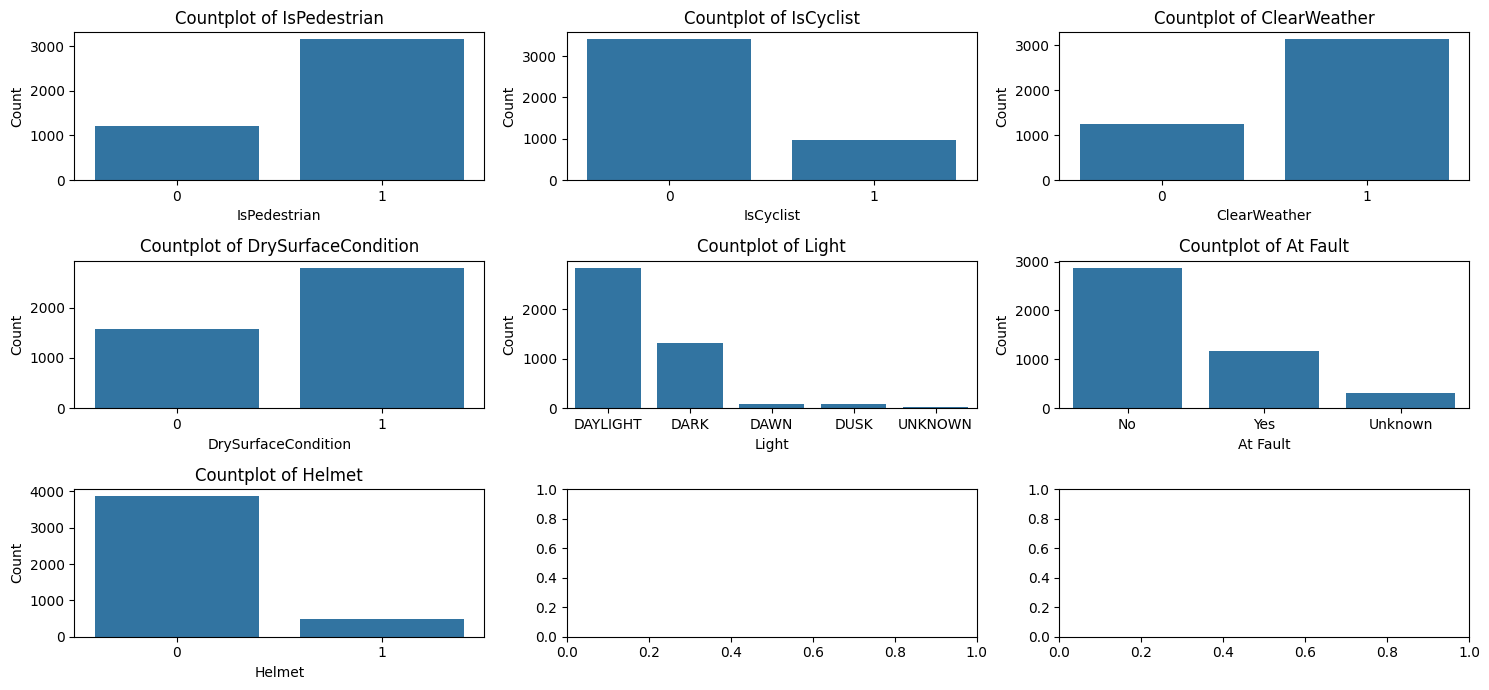

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplots for specified columns
cols_to_plot = ['IsPedestrian', "IsCyclist",  'ClearWeather', 'DrySurfaceCondition', 'Light', "At Fault", 'Helmet']

# Adjust the subplot grid to accommodate all plots
# We need at least 3 rows for 7 plots with 3 columns
fig, ax = plt.subplots(3, 3, figsize=(15, 7))  # Changed to 3 rows x 3 columns

# Flatten the ax array to iterate more easily
ax = ax.flatten() # makes the array one-dimensional

for i, col in enumerate(cols_to_plot):
    # Use i to index the flattened ax array
    sns.countplot(x=col, data=cleaned_nmdf, ax=ax[i])
    ax[i].set_title(f'Countplot of {col}') # set title to the specific subplot
    ax[i].set_xlabel(col) # set x label to the specific subplot
    ax[i].set_ylabel('Count') # set y label to the specific subplot


plt.tight_layout()
plt.show()

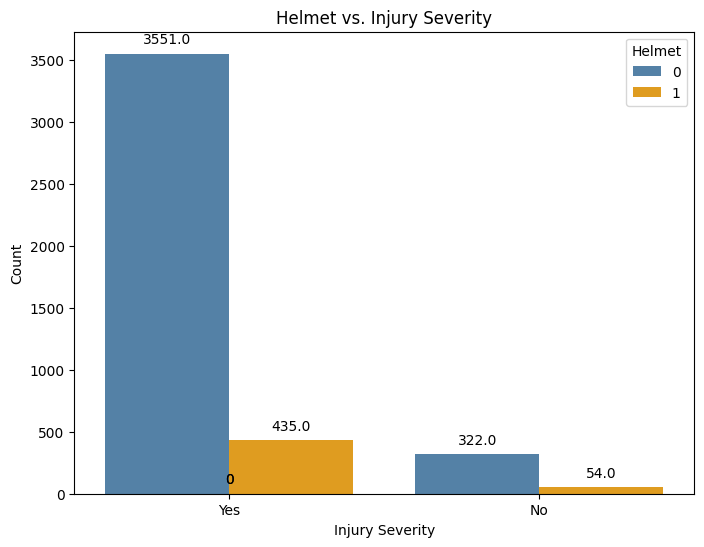

In [57]:
# prompt: plot chart for Helmet vs. Injury Severity and annotate values and keep orange color for Yes

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_nmdf' is your DataFrame
# and it contains columns 'Helmet' (0 or 1) and 'Injury Severity' ('No' or 'Yes')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Injury Severity', hue='Helmet', data=cleaned_nmdf, palette={0: 'steelblue', 1: 'orange'})
plt.title('Helmet vs. Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')

# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Modeling


In [101]:
nmdf_cleaned_encoded['Injury Severity']=nmdf_cleaned_encoded['Injury Severity'].replace({"No": 0, "Yes": 1})

<ipython-input-101-afa7cf66ab60>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nmdf_cleaned_encoded['Injury Severity']=nmdf_cleaned_encoded['Injury Severity'].replace({"No": 0, "Yes": 1})


In [102]:
# prompt: SMOTE

from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = nmdf_cleaned_encoded.drop('Injury Severity', axis=1)
y = nmdf_cleaned_encoded['Injury Severity']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Injury Severity'] = y_resampled

In [103]:
# prompt: train test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_resampled.drop('Injury Severity', axis=1),
    df_resampled['Injury Severity'],
    test_size=0.2,  # Adjust test_size as needed
    random_state=42  # Set random_state for reproducibility
)

In [104]:
# prompt: knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       782
           1       0.71      0.73      0.72       813

    accuracy                           0.71      1595
   macro avg       0.71      0.71      0.71      1595
weighted avg       0.71      0.71      0.71      1595

[[537 245]
 [216 597]]


In [105]:
# # prompt: hyper tune k in knn

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for k
# param_grid = {'n_neighbors': np.arange(1, 10)}

# # Initialize GridSearchCV
# grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy') # Or another relevant scoring metric

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# best_knn = grid_search.best_estimator_
# y_pred_knn = best_knn.predict(X_test)
# print(classification_report(y_test, y_pred_knn))
# print(confusion_matrix(y_test, y_pred_knn))

In [106]:
# # prompt: SVC

# from sklearn.svm import SVC

# # Initialize and train the SVC model
# svc_classifier = SVC(random_state=42)  # Set random_state for reproducibility
# svc_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_svc = svc_classifier.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred_svc))
# print(confusion_matrix(y_test, y_pred_svc))

In [107]:
df_resampled['Injury Severity']=df_resampled['Injury Severity'].replace({"No": 0, "Yes": 1})

### logistic regression

In [108]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# auc_roc



              precision    recall  f1-score   support

           0       0.65      0.66      0.66       782
           1       0.67      0.66      0.66       813

    accuracy                           0.66      1595
   macro avg       0.66      0.66      0.66      1595
weighted avg       0.66      0.66      0.66      1595

[[520 262]
 [279 534]]


In [109]:

# prompt: decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       782
           1       0.74      0.74      0.74       813

    accuracy                           0.73      1595
   macro avg       0.73      0.73      0.73      1595
weighted avg       0.73      0.73      0.73      1595

[[565 217]
 [208 605]]


### Random Forest

In [110]:
# prompt: random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       782
           1       0.73      0.76      0.75       813

    accuracy                           0.74      1595
   macro avg       0.74      0.74      0.74      1595
weighted avg       0.74      0.74      0.74      1595

[[558 224]
 [195 618]]


In [111]:
# prompt: decision tree feature importance

# Get feature importance from the trained DecisionTreeClassifier
feature_importance_dt = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_classifier.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)
feature_importance_dt.head(30)

,Feature,Importance
3,IsPedestrian,0.212862
18,Light_DAYLIGHT,0.083013
22,At Fault_Yes,0.080422
1,Pedestrian_Loca_At_Crosswalk,0.075987
5,DrySurfaceCondition,0.068654
21,At Fault_Unknown,0.062884
6,Pedestrian_Movement_Crossing,0.061847
4,ClearWeather,0.058218
16,Driver Substance Abuse_UNKNOWN,0.052516
7,Pedestrian_Movement_Walking,0.045944


In [116]:
# prompt: create a dataframe with columns accuracy precision and roc score of logistic regression, decision tree, knn and randomforest

from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_rf)],
    'ROC_AUC': [roc_auc_score(y_test, y_pred_proba_logreg), roc_auc_score(y_test, y_pred_proba_dt), roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:,1]), roc_auc_score(y_test, y_pred_proba_rf)]
}

df_results = pd.DataFrame(data)
df_results.T

,Model,Accuracy,Precision,ROC_AUC
0,Logistic Regression,0.660815,0.670854,0.735606
1,Decision Tree,0.733542,0.736010,0.829846
2,KNN,0.710972,0.709026,0.789214
3,Random Forest,0.737304,0.733967,0.840645


In [117]:
df_results.T

,0,1,2,3
Model,Logistic Regression,Decision Tree,KNN,Random Forest
Accuracy,0.660815,0.733542,0.710972,0.737304
Precision,0.670854,0.73601,0.709026,0.733967
ROC_AUC,0.735606,0.829846,0.789214,0.840645


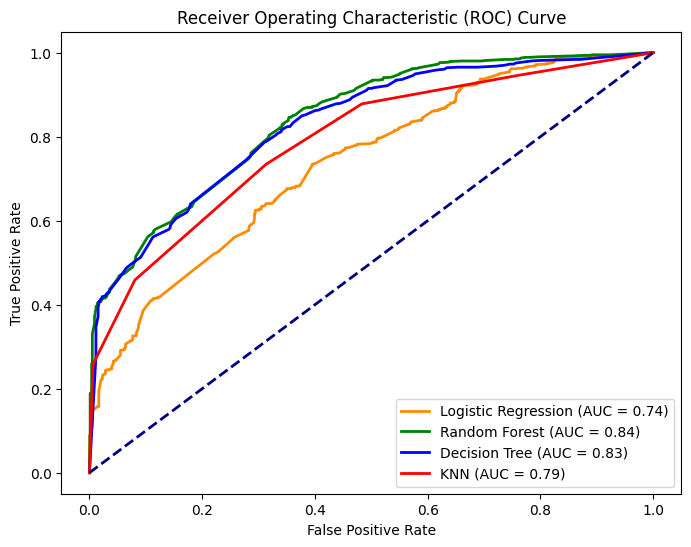

In [115]:
# prompt: roc auc curve for logistic regression, decision tree, knn and randomforest

# KNN ROC Curve
y_pred_proba_knn = knn_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Logistic Regression ROC Curve
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Random Forest ROC Curve
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Decision Tree ROC Curve
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_resampled['Injury Severity']=df_resampled['Injury Severity'].replace({"No": 0, "Yes": 1})

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

q1_X = df_resampled.drop(columns=["Injury Severity"])
q1_X = sm.add_constant(q1_X)
q1_y = df_resampled[["Injury Severity"]]


# X_train, X_test, y_train, y_test = train_test_split(q1_X, q1_y, test_size=0.3, random_state=42)




# Fit the logistic regression model
model = sm.Logit(q1_y, q1_X)
result = model.fit()


In [113]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:        Injury Severity   No. Observations:                 7972
Model:                          Logit   Df Residuals:                     7948
Method:                           MLE   Df Model:                           23
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                  0.1414
Time:                        03:13:34   Log-Likelihood:                -4744.3
converged:                      False   LL-Null:                       -5525.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       -2.8148   